# 5.3 Gradient Descent

실제값을 Y = 4X+6 시뮬레이션하는 데이터 값 생성
Gradient Descent의 업데이트 과정을 코드로 직접 구현함

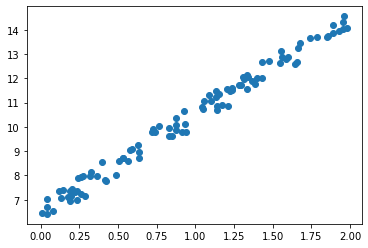

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 동일한 난수 생성을 위한 것
np.random.seed(0)

# randn, rand 는 다름
X = 2 * np.random.rand(100, 1)
y = 6 + 4*X + np.random.rand(100, 1)

plt.scatter(X, y)

In [3]:
X.shape

(100, 1)

In [4]:
# w1 과 w0 를 업데이트 할 w1_update, w2_update를 반환.
def get_weight_update(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0 의 shpae과 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    # w0_update를 dot 행렬 연사으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    
    # w1과 w0을 업데이트 할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [5]:
# 반복적으로 경사 하강법을 이용하여 get_weight_updates()를 호출하여 w1, w0를 업데이트
def gradient_descent_steps(X, y, iters = 10000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_update(w1, w0, X, y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [6]:
def get_cost(y, y_pred):
    N=len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [7]:
w1, w0  = gradient_descent_steps(X, y, iters=1000)
y_pred = w1[0,0]*X + w0
print(w1[0,0], w0[0,0])
print(get_cost(y, y_pred))

4.028260257450866 6.49047862852975
0.07754792006806614


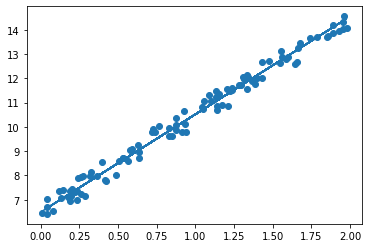

In [8]:
plt.scatter(X, y)
plt.plot(X, y_pred)

미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출

In [9]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # permutation은 해당 숫자 안에서 무작위로 숫자를 섞음
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_update(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [10]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.031 w0: 6.486
Stochastic Gradient Descent Total Cost:0.0777


# 5.4 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()
boston_DF = pd.DataFrame(boston.data, columns = boston.feature_names) 
boston_DF['PRICE'] = boston.target

In [12]:
boston_DF.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


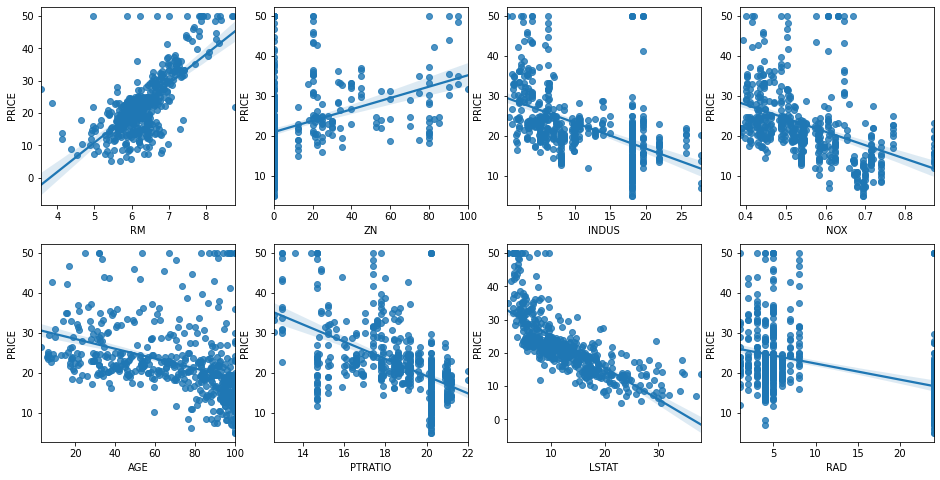

In [13]:
fig, axs = plt.subplots(figsize=(16, 8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col= i%4
    sns.regplot(x = feature, y = 'PRICE', data = boston_DF, ax = axs[row][col])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_data = boston_DF.drop('PRICE', axis = 1, inplace=False)
y_target = boston_DF['PRICE']

X_train, X_test, y_train, y_test= train_test_split(X_data, y_target, test_size = 0.3,
                                                  random_state=156)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print('mse : {0:.4f}, rmse : {1:.4f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

mse : 17.2969, rmse : 4.1590
Variance score : 0.757


In [15]:
print('회귀 계수 : ', np.round(lr.coef_, 1))
print('절편 : ', lr.intercept_)

회귀 계수 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]
절편 :  40.995595172164336


In [16]:
# 회귀계수를 큰 값 순으로 정렬하기 위해 Series로 생성
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [17]:
from sklearn.model_selection import cross_val_score

y_target = boston_DF['PRICE']
X_data = boston_DF.drop('PRICE', axis = 1, inplace = False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, 
                                 scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


cross validation을 했다 해서 성능이 항상 좋은 것은 아니다.

# 5.5  Polynomial Regression과 오버피팅/언더피팅 이해

In [18]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np 

# 다항식으로 변환한 단항식 생성 
X = np.arange(4).reshape(2,2)

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print(poly_ftr)

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [19]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

X = np.arange(0,4).reshape(2,2)
y = polynomial_func(X)

# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# linear Regression 에 3다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


Pipeline을 이용하여 3차 다항회귀 학습

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

model = Pipeline([('poly', PolynomialFeatures(degree = 3)),
                    ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
import numpy as np

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                   random_state=156)

# Pipeline을 이용하여 PolynomialFeatures 변환과 linearregression 적용을 순차적으로 결합.
p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias = False)),
                   ('linear', LinearRegression())])
p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

Boston 데이타셋 크기 : (506, 14)
MSE : 79625.593 , RMSE : 282.180
Variance score : -1116.598


In [22]:
X_train_poly = PolynomialFeatures(degree = 2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((354, 104), (354, 13))

# Regularized Linear Models - Ridge, Lasso

Ridge Regression

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_boston

boston = load_boston()

boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_df["PRICE"] = boston.target
print('boston 데이터 셋 크기', boston_df.shape)

y_target = boston_df['PRICE']
X_data = boston_df.drop('PRICE', axis = 1, inplace = False)

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, 
                                 scoring='neg_mean_squared_error',
                                 cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

boston 데이터 셋 크기 (506, 14)
 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


In [24]:
# alpha 값 변화하면서 rmse 측정
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, 
                                    scoring = 'neg_mean_squared_error',
                                    cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))
    

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


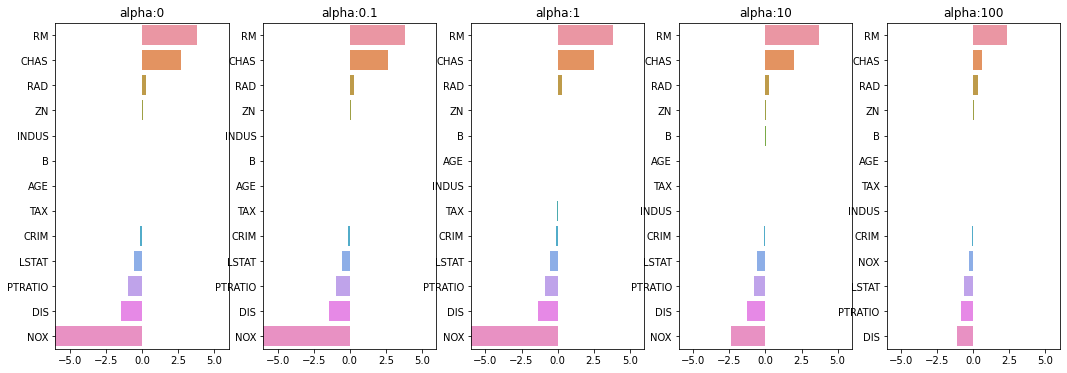

In [25]:
fig, axs = plt.subplots(figsize = (18, 6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataGrame의 컬럼으로 추가.
    coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # 막때 그래프로 각 alpha 값에서의 회귀 계수를 시각화, 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-6, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax = axs[pos])

plt.show()

In [26]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [37]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n = None, y_target_n = None,
                       verbose = True):
    ceff_df = pd.DataFrame()
    if verbose : print('####',model_name,'####')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha = param)
        elif model_name == 'Lasso': model = Lasso(alpha = param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha = alpha, 
                                                             l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, 
                                        scoring = 'neg_mean_squared_error',
                                        cv = 5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0} 일때 5폴드 세트의 평균 rmse : {1}'.format(param, avg_rmse))
        
        model.fit(X_data, y_target)
        coeff = pd.Series(data = model.coef_, index = X_data.columns)
        colname = 'alpha:'  + str(param)
        coeff_df[colname] = coeff
    
    return coeff_df                     

In [38]:
Lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = Lasso_alphas, X_data_n = X_data,
                                    y_target_n = y_target)

#### Lasso ####
alpha 0.07 일때 5폴드 세트의 평균 rmse : 5.612284267526674
alpha 0.1 일때 5폴드 세트의 평균 rmse : 5.615116035266936
alpha 0.5 일때 5폴드 세트의 평균 rmse : 5.669123409594897
alpha 1 일때 5폴드 세트의 평균 rmse : 5.776020813823375
alpha 3 일때 5폴드 세트의 평균 rmse : 6.1887632108009045


In [39]:
sort_column = 'alpha:' + str(Lasso_alphas[0])
coeff_lasso_df.sort_values(by = sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100,alpha:0.07,alpha:0.5,alpha:3,alpha:0.3
RM,3.809865,3.703202,0.949811,3.702272,2.334536,3.789725,2.498212,0.000000,0.000000
CHAS,2.686734,0.955190,0.000000,1.952021,0.638335,1.434343,0.000000,0.000000,0.000000
RAD,0.306049,0.274707,0.264206,0.279596,0.315358,0.270936,0.277451,0.061864,0.000000
ZN,0.046420,0.049211,0.049165,0.049579,0.054496,0.049059,0.049544,0.037231,0.000000
B,0.009312,0.010249,0.008247,0.010037,0.009393,0.010248,0.009469,0.006510,0.007863
NOX,-17.766611,-0.000000,-0.000000,-2.371619,-0.262847,-0.000000,-0.000000,0.000000,-0.000000
AGE,0.000692,-0.010037,0.020910,-0.010707,0.001212,-0.011706,0.003604,0.042495,-0.000000
TAX,-0.012335,-0.014570,-0.015212,-0.013993,-0.015856,-0.014290,-0.015442,-0.008602,-0.021195
INDUS,0.020559,-0.036619,-0.000000,-0.042962,-0.052826,-0.042120,-0.005253,-0.000000,-0.000000
CRIM,-0.108011,-0.097894,-0.063437,-0.101435,-0.102202,-0.098193,-0.083289,-0.000000,-0.000000


In [40]:
Elastic_alphas = [0.07, 0.1, 0.3, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = Elastic_alphas, X_data_n = X_data,
                                      y_target_n = y_target)

#### ElasticNet ####
alpha 0.07 일때 5폴드 세트의 평균 rmse : 8.344197597949647
alpha 0.1 일때 5폴드 세트의 평균 rmse : 8.344197597949647
alpha 0.3 일때 5폴드 세트의 평균 rmse : 8.344197597949647
alpha 1 일때 5폴드 세트의 평균 rmse : 8.344197597949647
alpha 3 일때 5폴드 세트의 평균 rmse : 8.344197597949647


In [41]:
sort_column = 'alpha:'+str(Elastic_alphas[0])
coeff_elastic_df.sort_values(by = sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100,alpha:0.07,alpha:0.5,alpha:3,alpha:0.3
B,0.009312,0.007863,0.007863,0.010037,0.009393,0.007863,0.009469,0.007863,0.007863
CRIM,-0.108011,-0.000000,-0.000000,-0.101435,-0.102202,-0.000000,-0.083289,-0.000000,-0.000000
ZN,0.046420,0.000000,0.000000,0.049579,0.054496,0.000000,0.049544,0.000000,0.000000
INDUS,0.020559,-0.000000,-0.000000,-0.042962,-0.052826,-0.000000,-0.005253,-0.000000,-0.000000
CHAS,2.686734,0.000000,0.000000,1.952021,0.638335,0.000000,0.000000,0.000000,0.000000
NOX,-17.766611,-0.000000,-0.000000,-2.371619,-0.262847,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.809865,0.000000,0.000000,3.702272,2.334536,0.000000,2.498212,0.000000,0.000000
AGE,0.000692,-0.000000,-0.000000,-0.010707,0.001212,-0.000000,0.003604,-0.000000,-0.000000
DIS,-1.475567,0.000000,0.000000,-1.248808,-1.153390,0.000000,-0.936605,0.000000,0.000000
RAD,0.306049,0.000000,0.000000,0.279596,0.315358,0.000000,0.277451,0.000000,0.000000


선형 회귀 모델을 위한 데이터 변환

(506,)


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

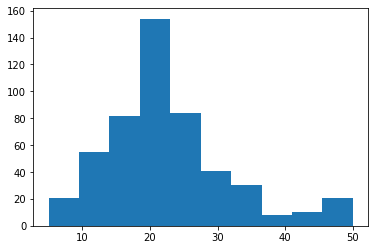

In [42]:
print(y_target.shape)
plt.hist(y_target, bins=10)

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

def get_scaled_data(method = 'None', p_degree = None, input_data = None) : 
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log' :
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree = p_degree,
                                        include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [46]:
alphas = [0.1, 1, 10, 100]

scale_methods = [(None, None), ('Standard', None), ('Standard', 2),
                ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods :
    X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1],
                                    input_data = X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0],
                                                        scale_method[1]))
    get_linear_reg_eval('Ridge', params = alphas, X_data_n = X_data_scaled,
                       y_target_n=y_target, verbose = False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1 일때 5폴드 세트의 평균 rmse : 5.7884866270324125
alpha 1 일때 5폴드 세트의 평균 rmse : 5.652570965613546
alpha 10 일때 5폴드 세트의 평균 rmse : 5.518166280868973
alpha 100 일때 5폴드 세트의 평균 rmse : 5.329589628472148

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1 일때 5폴드 세트의 평균 rmse : 5.825992799389442
alpha 1 일때 5폴드 세트의 평균 rmse : 5.802889517257738
alpha 10 일때 5폴드 세트의 평균 rmse : 5.6368312225590715
alpha 100 일때 5폴드 세트의 평균 rmse : 5.421374711794968

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1 일때 5폴드 세트의 평균 rmse : 8.827235873001722
alpha 1 일때 5폴드 세트의 평균 rmse : 6.871287525962414
alpha 10 일때 5폴드 세트의 평균 rmse : 5.484870425533339
alpha 100 일때 5폴드 세트의 평균 rmse : 4.6344377782619235

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1 일때 5폴드 세트의 평균 rmse : 5.763570225288301
alpha 1 일때 5폴드 세트의 평균 rmse : 5.465045081564938
alpha 10 일때 5폴드 세트의 평균 rmse : 5.754163637679423
alpha 100 일때 5폴드 세트의 평균 rmse : 7.634919863623537

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1 일때 5폴드 세트의 평균 

In [47]:
X = np.arange(6).reshape(3, 2)
poly = PolynomialFeatures(3)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])